# Gaussian Distribution

```{contents}
:local:
```

Perhaps the most important distribution is the Gaussian Distribution, also known
as the Normal Distribution.

## General Gaussian Distribution

### Definition

```{prf:definition} Gaussian Distribution (PDF)
:label: def_gaussian_distribution_pdf

$X$ is a continuous random variable with a **Gaussian distribution** if the probability density function is given by:

$$
\pdf(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \e \lcurl -\frac{(x - \mu)^2}{2 \sigma^2} \rcurl
$$ (eq:def_gaussian_distribution)

where $\mu$ is the mean and $\sigma^2$ is the variance and are parameters of the distribution.

Some conventions:
1. We write $X \sim \gaussian(\mu, \sigma^2)$ to indicate that $X$ has a Gaussian distribution with mean $\mu$ and variance $\sigma^2$.
2. We sometimes denote $\gaussian$ as $\normal$ or $\gaussiansymbol$.
```

```{prf:definition} Gaussian Distribution (CDF)
:label: def_gaussian_distribution_cdf

There is no closed form for the CDF of the Gaussian distribution.
But we will see that it is easy to compute the CDF of the Gaussian distribution
using the CDF of the standard normal distribution later.

Therefore, the CDF of the Gaussian distribution is given by:

$$
\cdf(x) = \int_{-\infty}^x \pdf(x) \, \mathrm{d}x
$$ (eq:def_gaussian_distribution_cdf)

Yes, you have to integrate the PDF to get the CDF but there is no "general" solution.
```

The PDF of the Gaussian distribution is shown below. The code is referenced and
modified from {cite}`foundations_of_data_science_with_python_2021`.

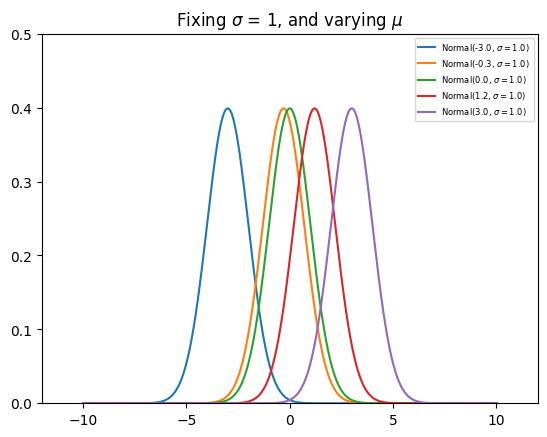

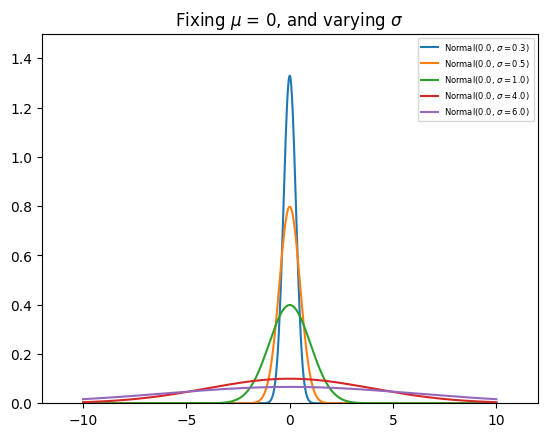

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

mean_1, mean_2, mean_3, mean_4, mean_5 = -3, -0.3, 0, 1.2, 3
sigma = 1

x = np.linspace(-10, 10, 1000)

all_params = [
    (mean_1, sigma),
    (mean_2, sigma),
    (mean_3, sigma),
    (mean_4, sigma),
    (mean_5, sigma),
]

for params in all_params:
    N = stats.norm(params[0], params[1])
    label = f"Normal({N.mean()}, $\sigma=${N.std() :.1f})"
    plt.plot(x, N.pdf(x), label=label)

plt.xlim(-12, 12)
plt.ylim(0, 0.5)
plt.legend(prop={'size': 6})
plt.title("Fixing $\sigma$ = 1, and varying $\mu$")
plt.show()

mean = 0
sigma_1, sigma_2, sigma_3, sigma_4, sigma_5 = 0.3, 0.5, 1, 4, 6

x = np.linspace(-10, 10, 1000)

all_params = [
    (mean, sigma_1),
    (mean, sigma_2),
    (mean, sigma_3),
    (mean, sigma_4),
    (mean, sigma_5),
]

for params in all_params:
    N = stats.norm(params[0], params[1])
    label = f"Normal({N.mean()}, $\sigma=${N.std() :.1f})"
    plt.plot(x, N.pdf(x), label=label)

plt.xlim(-12, 12)
plt.ylim(0, 1.5)
plt.legend(prop={"size": 6})
plt.title("Fixing $\mu$ = 0, and varying $\sigma$")
plt.show()

```{prf:remark} Gaussian Distribution (PDF)
:label: rmk_gaussian_distribution_pdf

Note in the plots above, the PDF of the Gaussian distribution is symmetric about the mean $\mu$, and
given a small enough $\sigma$, the PDF can be greater than 1, as long as the area under the curve is 1.

Note that the PDF curve moves left and right as $\mu$ increases and decreases, respectively.
Similarly, the PDF curve gets narrower and wider as $\sigma$ increases and decreases, respectively.
```

### Expectation and Variance

```{prf:theorem} Expectation and Variance of the Gaussian Distribution

The observant reader may notice that the mean and variance of the Gaussian distribution are parameters of the distribution.
However, this is not proven previously.

If $X$ is a continuous random variable with an gaussian distribution with mean $\mu$ and variance $\sigma^2$, then the
expectation and variance of $X$ are given by:

$$
\expectation \lsq X \rsq = \mu \qquad \text{and} \qquad \var \lsq X \rsq = \sigma^2
$$ (eq:gaussian_distribution_expectation_variance)
```

## Linear Transformation of Gaussian Distribution

```{prf:theorem} Linear Transformation of Gaussian Distribution
:label: thm_linear_transformation_gaussian_distribution

Let $X \sim \gaussiansymbol(\mu, \sigma^2)$ be a random variable with a Gaussian
distribution with mean $\mu$ and variance $\sigma^2$.

Let $Y = aX + b$ be a linear transformation of $X$.

Then, $Y \sim \gaussiansymbol(a\mu + b, a^2\sigma^2)$ is a Gaussian distribution with mean $a\mu + b$ and variance $a^2\sigma^2$.

In other words, $Y$ experiences a shift and scale change in coordinates, and while
the distribution may not longer be the same as $X$, it still belongs to the same family.
```

## Standard Gaussian Distribution

### Motivation

In continuous distributions, we are often asked to evaluate the probability of
an interval $[a, b]$. For example, if $X \sim \gaussian(\mu, \sigma^2)$, what is
the probability that $X$ is between $a$ and $b$? If we use PDF to compute the
probability, we will have to integrate the PDF over the interval $[a, b]$.

$$
\P \lsq a \leq X \leq b \rsq = \int_a^b \pdf(x) \, \mathrm{d}x
$$

We have seen that there is no closed form solution for this integral.

Furthermore, in practice, we use the CDF to compute the probability of an
interval.

$$
\P \lsq a \leq X \leq b \rsq = \cdf(b) - \cdf(a)
$$

However, we have also seen that there is no closed form solution for the CDF of
the Gaussian distribution since the CDF is an integral of the PDF.

This prompted the existence of the **standard normal distribution**.

### Definition

```{prf:definition} Standard Gaussian Distribution
:label: def_standard_gaussian_distribution

Let $X$ be a continuous random variable with a Gaussian distribution with mean $\mu$ and variance $\sigma^2$.
Then $X$ is said to be a **Standard Gaussian** if it has a Gaussian distribution with mean 0 and variance 1.

$$
\pdf(x) = \frac{1}{\sqrt{2 \pi}} \exp \lcurl -\frac{x^2}{2} \rcurl
$$ (eq:def_standard_normal_distribution_pdf)

In notations, it is $X \sim \gaussiansymbol(0, 1)$, with $\mu = 0$ and $\sigma^2 = 1$.
```

```{prf:definition} Standard Normal Distribution (CDF)
:label: def_standard_normal_distribution_cdf

The CDF of the **Standard Gaussian** is given by:

$$
\Phi(x) \defeq \cdf(x) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^x \exp \lcurl -\frac{t^2}{2} \rcurl \, \mathrm{d}t
$$

Take note of the $\Phi$ notation, which is the standard notation for the CDF of the Standard Gaussian.
```

/home/runner/work/omniverse/omniverse/omnivault/utils/reproducibility/seed.py:120: UserWarning: Deterministic mode is activated. This will negatively impact performance and may cause increase in CUDA memory footprint.
  configure_deterministic_mode()


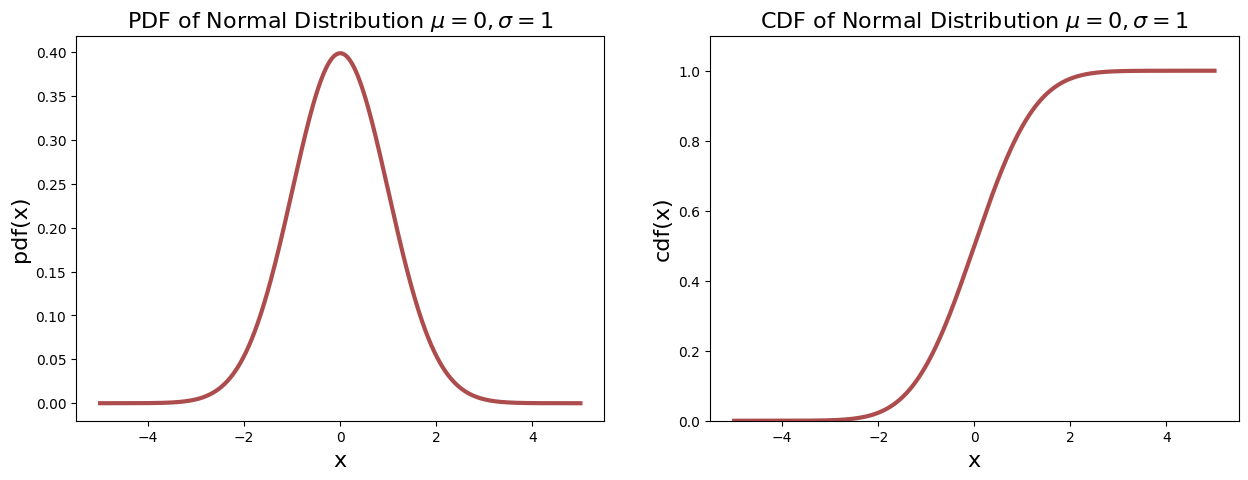

In [2]:
import sys
from pathlib import Path
parent_dir = str(Path().resolve().parents[2])
sys.path.append(parent_dir)

import numpy as np
import scipy.stats as stats

from omnivault.utils.reproducibility.seed import seed_all
from omnivault.utils.probability_theory.plot import plot_continuous_pdf_and_cdf
seed_all()

# x = np.linspace(0, 10, 5000)
mean, sigma = 0, 1
X = stats.norm(mean, sigma)

plot_continuous_pdf_and_cdf(X, -5, 5, title="Normal Distribution $\mu=0, \sigma=1$", figsize=(15, 5))

### Error Function

```{prf:definition} Error Function
:label: def_error_function

The **error function** is defined as:

$$
\text{erf}(x) \defeq \frac{2}{\sqrt{\pi}} \int_0^x \exp \lcurl -t^2 \rcurl \, \mathrm{d}t
$$

The connection of the error function to the CDF of the Standard Gaussian is given by:

$$
\Phi(x) = \frac{1}{2} \left( 1 + \text{erf} \lcurl \frac{x}{\sqrt{2}} \rcurl \right) \qquad \text{and} \qquad \text{erf}(x) = 2 \Phi(x\sqrt{2}) - 1
$$ (eq:standard_gaussian_cdf_error_function)
```

### CDF of Arbitrary Gaussian Distribution

```{prf:theorem} CDF of Arbitrary Gaussian Distribution
:label: thm_cdf_arbitrary_gaussian_distribution

Let $X$ be a continuous random variable with a Gaussian distribution with mean $\mu$ and variance $\sigma^2$.
Then we can convert the CDF of $X$ to the CDF of the Standard Gaussian by:

$$
\cdf(x) = \Phi \lpar \frac{x - \mu}{\sigma} \rpar
$$ (eq:cdf_arbitrary_gaussian_distribution)
```

```{prf:proof} CDF of Arbitrary Gaussian Distribution
The definition of a Gaussian distribution is given by:

$$
\begin{aligned}
\cdf(x) &= \P \lsq X \leq x \rsq \\
        &= \int_{-\infty}^x \pdf(t) \, \mathrm{d}t \\
        &= \int_{-\infty}^x \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \lcurl -\frac{(t - \mu)^2}{2 \sigma^2} \rcurl \, \mathrm{d}t \\
\end{aligned}
$$

We can use the (integration by) substitution $u = \frac{t - \mu}{\sigma}$ to get {cite}`chan_2021`:

$$
\begin{aligned}
\int_{-\infty}^x \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \lcurl -\frac{(t - \mu)^2}{2 \sigma^2} \rcurl \, \mathrm{d}t &= \int_{-\infty}^{\frac{x - \mu}{\sigma}} \frac{1}{\sqrt{2 \pi}} \exp \lcurl -\frac{u^2}{2} \rcurl \, \mathrm{d}u \\
&= \Phi \lpar \frac{x - \mu}{\sigma} \rpar
\end{aligned}
$$
```

```{prf:corollary} Probability of an Interval
:label: cor_probability_interval

As a consequence of {prf:ref}`thm_cdf_arbitrary_gaussian_distribution`, we can compute
the probability of an interval for an arbitrary Gaussian distribution. This
solves our problem of computing the probability of an interval for a Gaussian Distribution earlier.

$$
\begin{aligned}
\P \lsq a \leq X \leq b \rsq &= \cdf(b) - \cdf(a) \\
                             &= \P \lsq X \leq b \rsq - \P \lsq X \leq a \rsq \\
                             &= \Phi \lpar \frac{b - \mu}{\sigma} \rpar - \Phi \lpar \frac{a - \mu}{\sigma} \rpar
\end{aligned}
$$ (eq:probability_interval)
```

```{prf:corollary} Corollary of Standard Gaussian
:label: cor_standard_gaussian

As a consequence of {prf:ref}`thm_cdf_arbitrary_gaussian_distribution`, we have
the following corollaries {cite}`chan_2021`:

- $\Phi(y) = 1 - \Phi(-y)$
- $\P \lsq X \geq b \rsq = 1 - \Phi \lpar \frac{b - \mu}{\sigma} \rpar$
- $\P \lvert X \rvert \geq b = 1 - \Phi \lpar \frac{b - \mu}{\sigma} \rpar + \Phi \lpar \frac{-b - \mu}{\sigma} \rpar$
```

## References and Further Readings

-   Chan, Stanley H. "Chapter 4.6. Gaussian Random Variables." In Introduction
    to Probability for Data Science, 211-223. Ann Arbor, Michigan: Michigan
    Publishing Services, 2021.
-   Pishro-Nik, Hossein. "Chapter 4.2.3. Normal (Gaussian) Distribution" In
    Introduction to Probability, Statistics, and Random Processes, 253-260.
    Kappa Research, 2014.
-   https://jmshea.github.io/Foundations-of-Data-Science-with-Python/08-random-variables/important-continuous-rvs.html#normal-gaussian-random-variable